In [10]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

# 손실 곡선

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


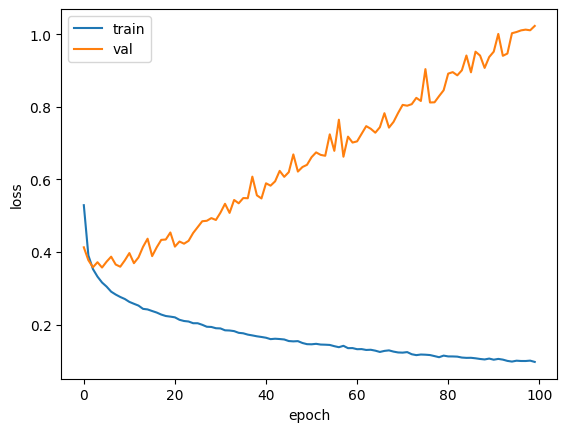

In [11]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = model_fn()
model.summary()
    
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=100, verbose=0, # verbose : log
                    validation_data=(val_scaled, val_target)) # 검증손실 계산
print(history.history.keys()) # dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-04', dpi=300)
plt.show()

optimizer='adam'인 경우

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


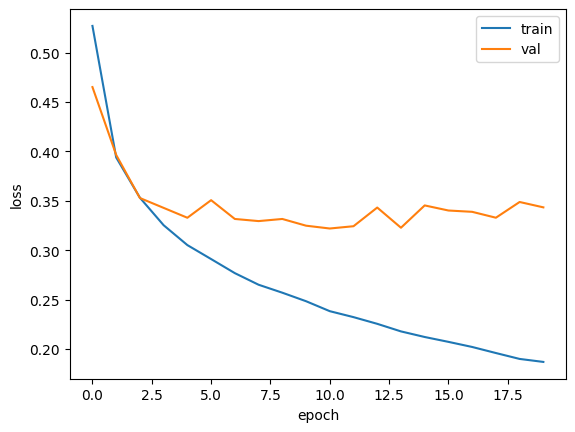

In [13]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, # verbose : log
                    validation_data=(val_scaled, val_target)) # 검증손실 계산
print(history.history.keys()) # dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-05', dpi=300)
plt.show()

# Drop out
- 학습 과정에서 일정 비율에 대한 뉴런 랜덤 제외

- 모델 평가/예측 시에는 자동으로 드롭아웃 레이어가 제외된다. (by keras)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


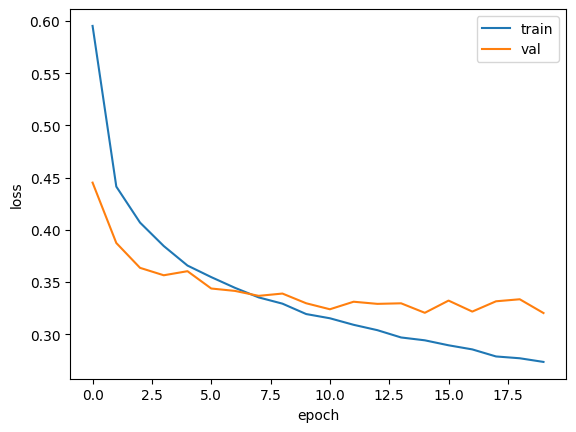

In [15]:
model = model_fn(keras.layers.Dropout(0.3)) # 30% 뉴런 제외
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target)) # 검증손실 계산

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-06', dpi=300)
plt.show()

# 모델 저장과 복원

- 모델 저장

In [16]:
model.save_weights('model-weights.h5') # 학습된 모델의 파라미터를 저장
model.save('model-whole.h5') # 모델 구조와 모델 파라미터를 모두 저장하는 방법

- 학습 모델 파라미터 복원

In [17]:
model = model_fn(keras.layers.Dropout(0.3)) # 학습되지 않은 모델, save_weigths()로 저장했던 모델과 동일한 구조로 준비
model.load_weights('model-weights.h5')

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3203 - accuracy: 0.8892


[0.32028886675834656, 0.8891666531562805]

- 모델 전체 복원

In [18]:
# 모델 전체 복원
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8892


[0.32028886675834656, 0.8891666531562805]

# Callback

ModelCheckpoint 콜백

- 최상의 검증 점수를 만드는 모델을 자동으로 저장

In [14]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

# 저장 정보 호출
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.8848


[0.31791946291923523, 0.8847500085830688]

조기 종료 (Early Stropping)

- 검증 점수가 상승하기 시작하면 그 후엔 무조건 과대적합이므로 훈련 지속 필요성 X

- 과대적합이 시작되기 전에 학습을 중지

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

early_stoping_cb = keras.callbacks.EarlyStopping(patience=2, # n번 연속 검증점수가 향상되지 않으면 학습 중지
                                                 restore_best_weights=True) # True 설정 시, 가장 낮은 검증 손실 모델 파라미터 되돌림

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stoping_cb])